In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, FloatSlider, Checkbox
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from IPython.display import clear_output, display, HTML
%matplotlib notebook
mpl.style.use('ggplot')

In [2]:
def set_defaults():
    A = np.arange(1., 100, 1.)
    R = np.arange(1., 100, 1.) 
    P = np.arange(1., 100., 1.)
    return (A, R, P)

In [3]:
def treat_eff(R, P):
    eff = (1 - P/R)
    if isinstance(eff, float):
        return eff
    return np.ma.masked_where(eff<0, eff)
                           
def pot_load_inc(R, A):
    return (R / (R + A))

def score(R, P, A):
    return treat_eff(R, P) * pot_load_inc(R, A)


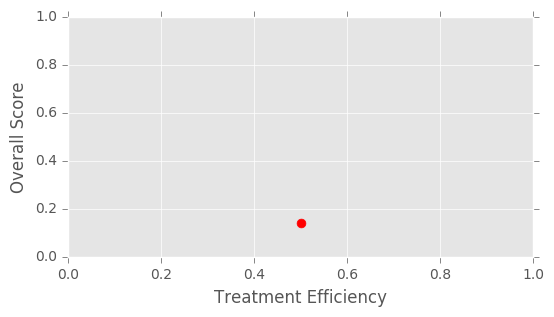

<function __main__.mkplot>

In [4]:
f, a = plt.subplots(1,1, figsize=(6,3))
a.set_xlabel('Treatment Efficiency')
a.set_ylabel('Overall Score')
A, R, P = set_defaults()
line, = a.plot(treat_eff(R, P), score(R, P, A))
dot = a.scatter([],[],color='r', s=40)
def mkplot(doR, doP, doA, R, P, A):
    _A, _R, _P = set_defaults()
    if doA:
        A = _A
    if doR:
        R = _R
    if doP:
        P = _P
    _eff = treat_eff(R, P)
    _score = score(R, P, A)
    if isinstance(_eff, float) and isinstance(_score, float):
        line.set_visible(False)
        dot.set_offsets([[_eff, _score]])
        dot.set_visible(True)
    else:
        dot.set_visible(False)
        line.set_visible(True)    
        line.set_xdata(treat_eff(R, P))
        line.set_ydata(score(R, P, A))
    a.set_xlim(0, 1)
    a.set_ylim(0, 1)
    display(f)

doR = Checkbox(description='Range of Raw', value=False)
doP = Checkbox(description='Range of Post-treatment', value=False)
doA = Checkbox(description='Range of Ambient', value=False)
valR = FloatSlider(value=20, min=0.0, max=100.0, step=1.0, description='Raw:')
valP = FloatSlider(value=10, min=0.0, max=100.0, step=1.0, description='Post-treatment:')
valA = FloatSlider(value=50, min=0.0, max=100.0, step=1.0, description='Ambient:')

def update_R(*args):
    if valR.value < valP.value:
        valR.value = valP.value
valP.observe(update_R, 'value')

def update_P(*args):
    if valP.value > valR.value:
        valP.value = valR.value
valR.observe(update_P, 'value')

interact(mkplot, doR=doR, doP=doP, doA=doA, R=valR, P=valP, A=valA)